In [29]:
import time
from itertools import compress
from skimage.util.shape import view_as_windows
import matplotlib.pyplot as plt
import numpy as np  
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

### Load the training dataset, apply normalization and prepare patches

In [15]:
def split_Image(bigImage,isMask,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number):
#     print(bigImage.shape)
    if isMask==True:
        arr = np.pad(bigImage,((top_pad,bottom_pad),(left_pad,right_pad)),"reflect")
        splits = view_as_windows(arr, (splitsize,splitsize),step=stepsize)
        splits = splits.reshape((vertical_splits_number*horizontal_splits_number,splitsize,splitsize))
    else: 
        arr = np.pad(bigImage,((top_pad,bottom_pad),(left_pad,right_pad),(0,0)),"reflect")
        splits = view_as_windows(arr, (splitsize,splitsize,3),step=stepsize)
        splits = splits.reshape((vertical_splits_number*horizontal_splits_number,splitsize,splitsize,3))
    return splits # return list of arrays.

### Test dataset splitting into 140 blocks, every 5 lines in each file

In [3]:
path = "data_download/full_data/ori_data"
seistest = np.load(os.path.join(path,"seistest_sort_full.npy"))
faulttest = np.load(os.path.join(path,"faulttest_full.npy"))

In [3]:
faulttest= np.moveaxis(faulttest,-2,-1)

In [4]:
print('Seismic test shape',seistest.shape)
print('Fault test shape',faulttest.shape)

Seismic test shape (703, 1537, 3174)
Fault test shape (703, 1537, 3174)


In [11]:
print(seistest.max(),seistest.min(), faulttest.max(), faulttest.min())

1.0 0.0 True False


In [5]:
directory = "data_download/full_data/patches/seismic/test_byline"
if not os.path.exists(directory):
    os.makedirs(directory)
directory = "data_download/full_data/patches/fault/test_byline"
if not os.path.exists(directory):
    os.makedirs(directory)

In [7]:
patches_path = 'data_download/full_data/patches'

count = 0
for i in range(0,len(seistest),5):
    np.save("{}/seismic/test_byline/{}.npy".format(patches_path, count),seistest[i])
    np.save("{}/fault/test_byline/{}.npy".format(patches_path, count),faulttest[i])
    count = count + 1

### Load a block of seismic and fault from test dataset for preparing patches  

In [9]:
# select one of the files from test dataset
id = '20'
seis_patches_path = 'data_download/full_data/patches/seismic/test_byline/'
fault_patches_path = 'data_download/full_data/patches/fault/test_byline/'

seis = np.load(os.path.join(seis_patches_path,id+'.npy'))
fault = np.load(os.path.join(fault_patches_path,id+'.npy'))
print(seis.shape)
print(fault.shape)

(1537, 3174)
(1537, 3174)


In [10]:
Z, XL = seis.shape

im_height = Z
im_width = XL
splitsize = 96
stepsize = 48 #overlap half
overlapsize = splitsize-stepsize

In [11]:
horizontal_splits_number = int(np.ceil((im_width)/stepsize))
print(horizontal_splits_number)
width_after_pad = stepsize*horizontal_splits_number+2*overlapsize
print(width_after_pad)
left_pad = int((width_after_pad-im_width)/2)
right_pad = width_after_pad-im_width-left_pad
print(left_pad,right_pad)

vertical_splits_number = int(np.ceil((im_height)/stepsize))
print(vertical_splits_number)
height_after_pad = stepsize*vertical_splits_number+2*overlapsize
print(height_after_pad)
top_pad = int((height_after_pad-im_height)/2)
bottom_pad = height_after_pad-im_height-top_pad
print(top_pad,bottom_pad)

67
3312
69 69
33
1680
71 72


In [12]:
horizontal_splits_number = horizontal_splits_number+1
print(horizontal_splits_number)
vertical_splits_number = vertical_splits_number+1
print(vertical_splits_number)

68
34


In [13]:
halfoverlapsize = int(overlapsize/2)
print(halfoverlapsize)

24


In [16]:
t_start = time.time()
X_list = []

X_list.extend(split_Image(seis,True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number))
    
print(len(X_list))
print(X_list[0].shape)
print("read images in {} sec".format(time.time()-t_start))
X = np.asarray(X_list)
print(X.shape)
print("read images in {} sec".format(time.time()-t_start))

X = X.astype(np.float32)
print(X.shape)

2312
(96, 96)
read images in 0.07453680038452148 sec
(2312, 96, 96)
read images in 0.12341594696044922 sec


In [18]:
t_start = time.time()
Y_list = []

Y_list.extend(split_Image(fault,True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number))
    
print(len(Y_list))
print(Y_list[0].shape)
print("read images in {} sec".format(time.time()-t_start))
Y = np.asarray(Y_list)
print(Y.shape)
print("read images in {} sec".format(time.time()-t_start))

Y = Y.astype(np.float32)
print(Y.shape)

2312
(96, 96)
read images in 0.01697063446044922 sec
(2312, 96, 96)
read images in 0.023951053619384766 sec
(2312, 96, 96)


In [ ]:
path = 'data_download/full_data/patches/seismic/test_output/'
if not os.path.exists(path):
    os.makedirs(path)
path = 'data_download/full_data/patches/fault/test_output/'
if not os.path.exists(path):
    os.makedirs(path)

In [25]:
seis_path = 'data_download/full_data/patches/seismic/test_output/'
seis_outpath = os.path.join(seis_path,'seis_test_'+id+'_thebe.npy')

fault_path = 'data_download/full_data/patches/fault/test_output/'
fault_outpath = os.path.join(fault_path,'fault_test_'+id+'_thebe.npy')

In [26]:
np.save(seis_outpath, X)

In [27]:
np.save(fault_outpath,Y)

### Preparation for wisting


In [88]:
seis_img_path = '../seismic_images/images_IL_XL_labels/seismic/cropped_seismic_gray/IL4500.png'
fault_img_path = '../seismic_images/images_IL_XL_labels/labels/cropped_labels_gray/IL4500_fault.png'


(860, 1341)
(860, 1341)


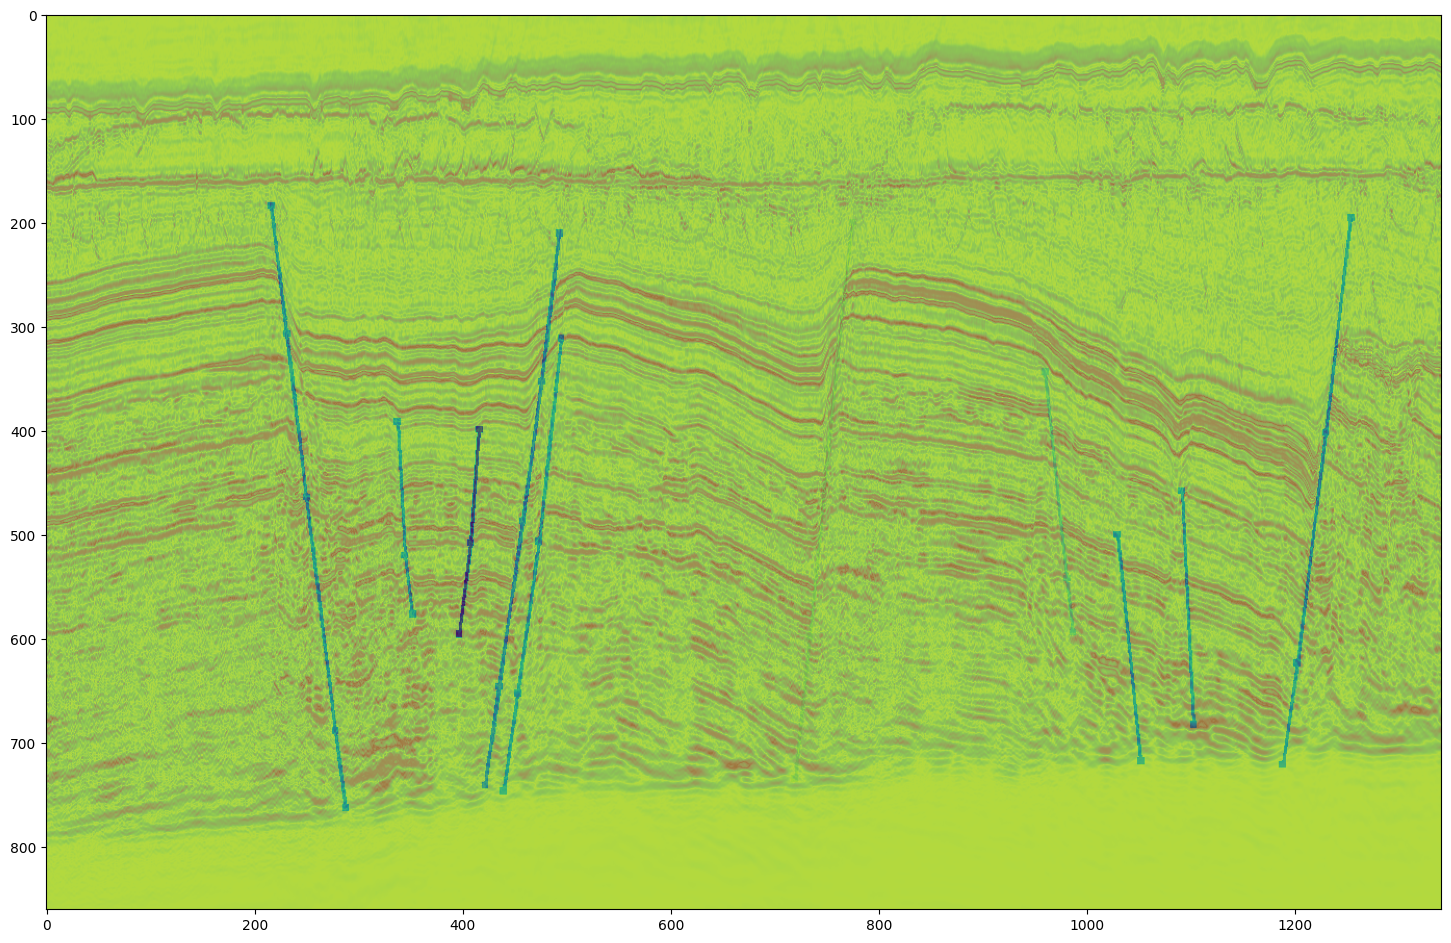

In [89]:
seismic = cv2.imread(seis_img_path,cv2.IMREAD_GRAYSCALE)
fault = cv2.imread(fault_img_path,cv2.IMREAD_GRAYSCALE)
print(seismic.shape)
print(fault.shape)

plt.figure(figsize=(18,18))
plt.imshow(seismic)
plt.imshow(fault,alpha=0.5)
plt.show()

In [90]:
print(seismic.shape)
print(fault.shape)

(860, 1341)
(860, 1341)


In [91]:
print(fault.min(),fault.max())
print(seismic.min(),seismic.max())

76 255
22 255


In [92]:
# threshold and rescale the fault labels

threshold = np.quantile(fault, q=0.01)
fault = np.where(fault>threshold, 0, 255)

In [93]:
fault.min(),fault.max() # in a pixel range (0,255)

(0, 255)

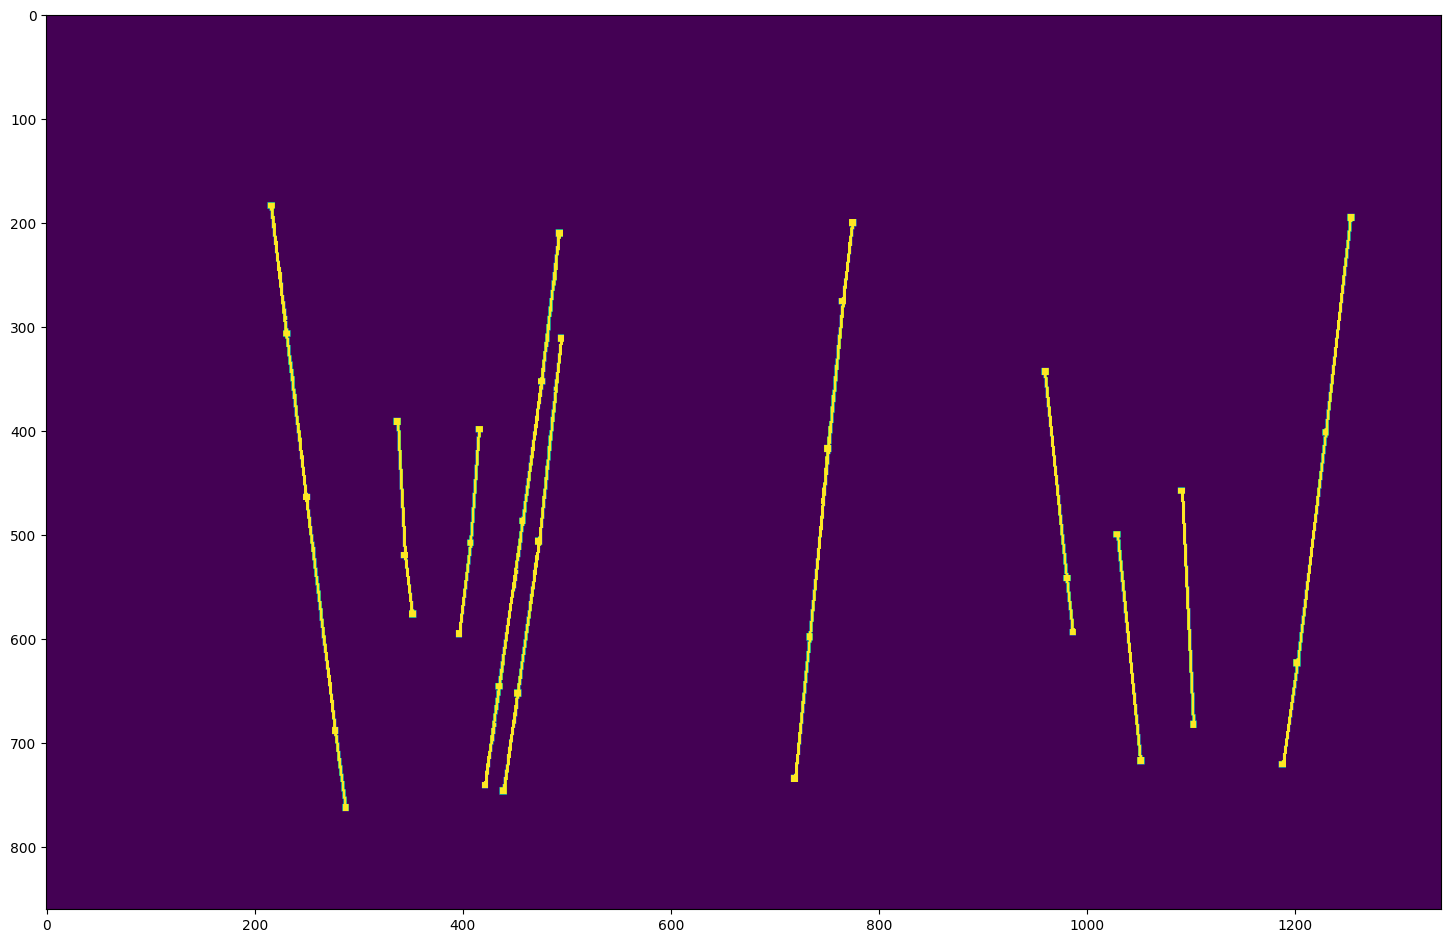

In [94]:
plt.figure(figsize=(18,18))
plt.imshow(fault)
plt.show()

In [95]:
# apply with min-max normalization, in a range of (0 and 1)

fault = fault.astype(np.float32) / 255.0
fault.min(), fault.max()

(0.0, 1.0)

In [96]:
# min-max normalization for seis image, in a range of (0 and 1)

seismic = (seismic - seismic.min()) / (seismic.max() - seismic.min())
seismic.min(), seismic.max()

(0.0, 1.0)

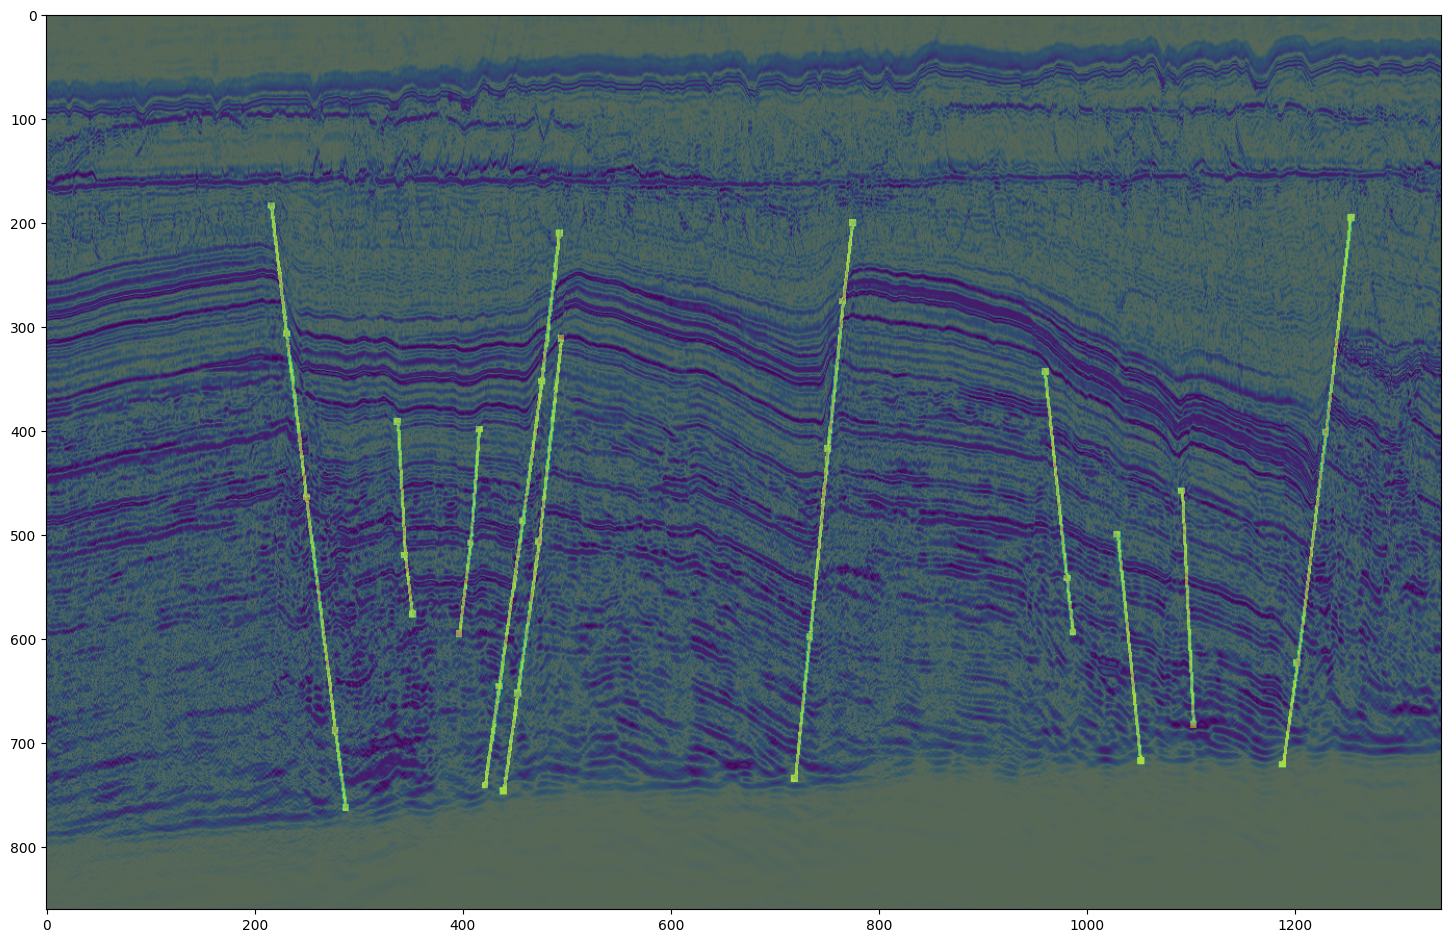

In [97]:
# QC for fault label, 1 represents fault, 0 presents without fault.

plt.figure(figsize=(18,18))
plt.imshow(seismic)
plt.imshow(fault,alpha=0.5)
plt.show()

## prepare wisting patches

In [98]:
print(seismic.shape)
print(fault.shape)

(860, 1341)
(860, 1341)


In [99]:
Z, XL = seismic.shape

im_height = Z
im_width = XL
splitsize = 96
stepsize = 48 #overlap half
overlapsize = splitsize-stepsize

In [100]:
horizontal_splits_number = int(np.ceil((im_width)/stepsize))
print(horizontal_splits_number)
width_after_pad = stepsize*horizontal_splits_number+2*overlapsize
print(width_after_pad)
left_pad = int((width_after_pad-im_width)/2)
right_pad = width_after_pad-im_width-left_pad
print(left_pad,right_pad)

vertical_splits_number = int(np.ceil((im_height)/stepsize))
print(vertical_splits_number)
height_after_pad = stepsize*vertical_splits_number+2*overlapsize
print(height_after_pad)
top_pad = int((height_after_pad-im_height)/2)
bottom_pad = height_after_pad-im_height-top_pad
print(top_pad,bottom_pad)

28
1440
49 50
18
960
50 50


In [101]:
horizontal_splits_number = horizontal_splits_number+1
print(horizontal_splits_number)
vertical_splits_number = vertical_splits_number+1
print(vertical_splits_number)

29
19


In [102]:
halfoverlapsize = int(overlapsize/2)
print(halfoverlapsize)

24


In [103]:
t_start = time.time()
X_list = []

X_list.extend(split_Image(seismic,True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number))
    
print(len(X_list))
print(X_list[0].shape)
print("read images in {} sec".format(time.time()-t_start))
X = np.asarray(X_list)
print(X.shape)
print("read images in {} sec".format(time.time()-t_start))

X = X.astype(np.float32)
print(X.shape)

551
(96, 96)
read images in 0.02864217758178711 sec
(551, 96, 96)
read images in 0.04360198974609375 sec
(551, 96, 96)


In [104]:
t_start = time.time()
Y_list = []

Y_list.extend(split_Image(fault,True,top_pad,bottom_pad,left_pad,right_pad,splitsize,stepsize,vertical_splits_number,horizontal_splits_number))
    
print(len(Y_list))
print(Y_list[0].shape)
print("read images in {} sec".format(time.time()-t_start))
Y = np.asarray(Y_list)
print(Y.shape)
print("read images in {} sec".format(time.time()-t_start))

Y = Y.astype(np.float32)
print(Y.shape)

551
(96, 96)
read images in 0.009380817413330078 sec
(551, 96, 96)
read images in 0.019366025924682617 sec
(551, 96, 96)


In [105]:
id= 'IL4500'

seis_path = 'data_download/full_data/patches/seismic/test_output/'
seis_outpath = os.path.join(seis_path,'seis_test_'+id+'_wisting.npy')

fault_path = 'data_download/full_data/patches/fault/test_output/'
fault_outpath = os.path.join(fault_path,'fault_test_'+id+'_wisting.npy')

In [106]:
np.save(seis_outpath, X)
np.save(fault_outpath,Y)